In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## ⚡ Import main libraries necessary for this project:

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os
import re

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer  

## ⚡ Read the train data:

In [3]:

df_train = pd.read_csv('/kaggle/input/arabic-hwr-ai-pro-intake1/train.csv')
df_train.shape

(13440, 2)

In [4]:
df_train.groupby(by='label').count()

,id
label,
1,480
2,480
3,480
4,480
5,480
6,480
7,480
8,480
9,480


In [5]:
df_train.head()

,id,label
0,0,24
1,1,2
2,2,17
3,3,14
4,4,19


In [6]:
#read images as grayscale as colors aren't actually effect in our example
images_train = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in sorted(glob.glob("/kaggle/input/arabic-hwr-ai-pro-intake1/train/*.png"))]
images_train = np.array(images_train)
print("train images shape: {}".format(images_train.shape))

train images shape: (13440, 32, 32)


In [7]:
# add 1 more dimenision for images train to prepare for CNN
images_train = images_train.reshape((-1, 32, 32, 1))
print("images shape: {}".format(images_train.shape))

#preprocessing images train
images_train = images_train/255

images shape: (13440, 32, 32, 1)


## ⚡ Exploratory Data Analysis:

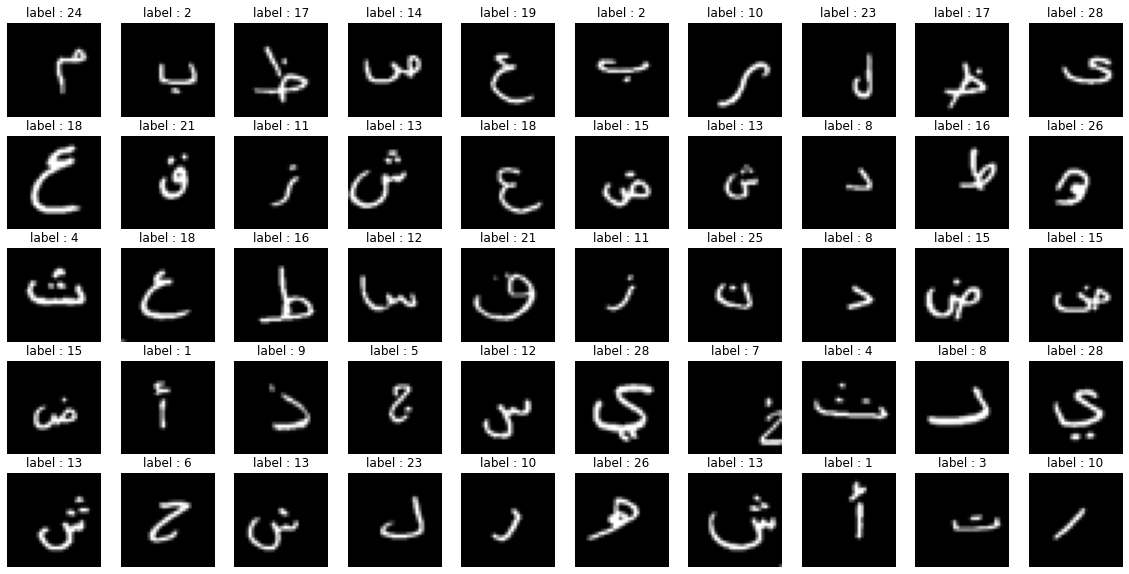

In [8]:

# show first 50 images
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(images_train[i], cmap='gray')
    plt.axis('off')
    plt.title('label : {}'.format(df_train.label.iloc[i]))

## ⚡ Data Preprocessing:

In [9]:

#prepare y to CNN we use labelBinarizer
binencoder = LabelBinarizer()
y = binencoder.fit_transform(df_train.label.to_numpy())
print("y shape: {}".format(y.shape))
print(y[0:5])

y shape: (13440, 28)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


## ⚡ Data Splitting:

In [10]:

X_train, X_val, y_train, y_val = train_test_split(images_train, y, test_size = 0.2, random_state=42, stratify= y)
print("X_train shape: {}\nX_val shape: {}".format(X_train.shape, X_val.shape))

X_train shape: (10752, 32, 32, 1)
X_val shape: (2688, 32, 32, 1)


In [11]:
#checking if strartify is working right
print(y_train.sum(axis=0))
print(y_val.sum(axis=0))

[384 384 384 384 384 384 384 384 384 384 384 384 384 384 384 384 384 384
 384 384 384 384 384 384 384 384 384 384]
[96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96]


In [12]:
# Train with ALL DATA to increase accuracy after it has been validated.

# X_train = images_train
# y_train = y

## ⚡ CNN Model Training:

In [13]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15833801608694304018
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16152002560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8447124811845758022
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


2021-10-28 11:32:47.544612: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-28 11:32:47.591412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:47.691980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:47.692718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [14]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

# adjust values to your needs
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} )
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)

2021-10-28 11:32:49.601967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:49.603175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:49.604250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:49.605350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:49.606392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [15]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(32, 32, 3)),
#     tf.keras.layers.MaxPooling2D(pool_size=2),

#     tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
    
#     tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
    
#     tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
    
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(29, activation='softmax')
 
# ])

# Total params: 101,181
# Trainable params: 101,181
# Non-trainable params: 0

In [16]:
# we can change initializer weights types and see about kernal size

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D

model = Sequential()

model.add(Conv2D(filters=16,kernel_size=5,input_shape=(32,32,1),padding ='same', activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Conv2D(filters=32,kernel_size=3,padding ='same',activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=3,padding ='same',activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=3,padding ='same',activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(128,activation='tanh', kernel_initializer='he_normal',kernel_regularizer='l2'))
model.add(BatchNormalization())


model.add(Dense(28, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# __________________________
#(16->128)(5,5)(tanh)
# Total params: 168,156
# Trainable params: 167,420
# Non-trainable params: 736

2021-10-28 11:32:50.421723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:50.422616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:50.423270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:50.424148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 11:32:50.424783: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [18]:
# We will import a call back to save the best epoch's weights
from tensorflow.keras.callbacks import ModelCheckpoint                                     

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, monitor='val_accuracy', mode='max', save_best_only=True)

earltstopping = EarlyStopping(monitor='val_accurracy',patience=7, min_delta=0.001)
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=32, callbacks=[checkpointer,earltstopping])

2021-10-28 11:32:51.473762: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2021-10-28 11:32:53.292619: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


269/269 [==============================] - 9s 7ms/step - loss: 4.2569 - accuracy: 0.2911 - val_loss: 6.4485 - val_accuracy: 0.0972

Epoch 00001: val_accuracy improved from -inf to 0.09716, saving model to weights.hdf5
Epoch 2/300
269/269 [==============================] - 2s 6ms/step - loss: 2.2650 - accuracy: 0.5542 - val_loss: 2.3108 - val_accuracy: 0.4793

Epoch 00002: val_accuracy improved from 0.09716 to 0.47931, saving model to weights.hdf5
Epoch 3/300
269/269 [==============================] - 2s 7ms/step - loss: 1.4395 - accuracy: 0.6713 - val_loss: 1.1831 - val_accuracy: 0.6890

Epoch 00003: val_accuracy improved from 0.47931 to 0.68898, saving model to weights.hdf5
Epoch 4/300
269/269 [==============================] - 2s 7ms/step - loss: 1.0789 - accuracy: 0.7183 - val_loss: 0.9040 - val_accuracy: 0.7583

Epoch 00004: val_accuracy improved from 0.68898 to 0.75825, saving model to weights.hdf5
Epoch 5/300
269/269 [==============================] - 2s 6ms/step - loss: 0.8624 -

In [19]:
# Loading the best weights
model.load_weights('weights.hdf5')   
# Evaluating our model
model.evaluate(X_val, y_val)

84/84 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9717


[0.15594562888145447, 0.9717261791229248]

In [20]:
y_pred = model.predict(X_val)

pred = np.argmax(y_pred, axis=1) + 1 
ground = np.argmax(y_val, axis=1) + 1

print(classification_report(ground,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        96
           2       0.96      0.99      0.97        96
           3       0.94      0.94      0.94        96
           4       0.97      0.94      0.95        96
           5       0.97      0.98      0.97        96
           6       0.95      0.97      0.96        96
           7       1.00      0.94      0.97        96
           8       0.93      0.98      0.95        96
           9       0.96      0.94      0.95        96
          10       0.97      0.98      0.97        96
          11       0.98      0.95      0.96        96
          12       0.97      0.99      0.98        96
          13       1.00      0.97      0.98        96
          14       0.97      0.98      0.97        96
          15       0.99      0.98      0.98        96
          16       0.94      1.00      0.97        96
          17       1.00      0.94      0.97        96
          18       0.95    

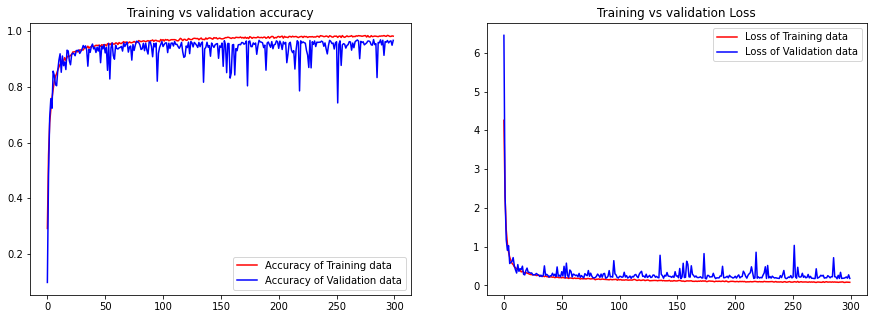

In [21]:
get_acc = hist.history['accuracy']
value_acc = hist.history['val_accuracy']
get_loss = hist.history['loss']
validation_loss = hist.history['val_loss']


epochs = range(len(get_acc))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation Loss')
plt.legend()

plt.show()

## ⚡ Read the test data:

In [22]:

#read images as grayscale as colors aren't actually effect in our example
images_test = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in sorted(glob.glob("/kaggle/input/arabic-hwr-ai-pro-intake1/test/*.png"))]
images_test = np.array(images_test)

print("train images shape: {}".format(images_test.shape))

train images shape: (3360, 32, 32)


In [23]:
# add 1 more dimenision for images train to prepare for CNN
images_test = images_test.reshape((-1, 32, 32, 1))
print("images shape: {}".format(images_test.shape))

#preprocessing images train
images_test = images_test/255

images shape: (3360, 32, 32, 1)


In [24]:
imagesName_test = [re.sub(r'\D', "",os.path.basename(file)) for file in sorted(glob.glob("/kaggle/input/arabic-hwr-ai-pro-intake1/test/*.png"))]
df_test = pd.DataFrame(imagesName_test,columns=["id"])


## ⚡ Model evaluation:

In [25]:

y_pred_test = model.predict(images_test)
df_test["label"] = np.argmax(y_pred_test, axis=1) + 1

df_test.head()

,id,label
0,00000,26
1,00001,10
2,00002,1
3,00003,10
4,00004,15


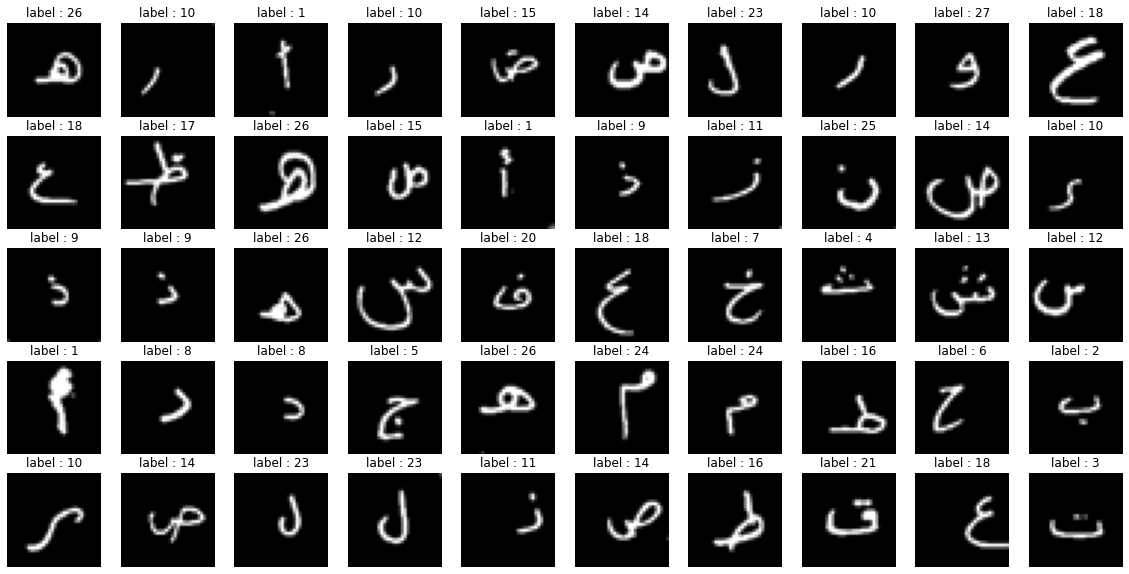

In [26]:
# show first 50 images
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(images_test[i], cmap='gray')
    plt.axis('off')
    plt.title('label : {}'.format(df_test.label.iloc[i]))

## ⚡ Submitting csv file:

In [27]:
df_test[['id', 'label']].to_csv('submission.csv', index=False)